#Trabalho Final da Disciplina Agrupamento de Dados

## 1 - Instalando as bibliotecas necessárias para rodar o projeto

In [ ]:
!pip install hdbscan
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

## 2 - Carregando as bases de dados

#### Wine Quality Dataset (Repositório UCI)
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregar dados
wine_data = pd.read_csv('../datasets/winequality-red.csv', delimiter=';')

# Remover valores ausentes (se houver)
wine_data = wine_data.dropna()

# Separar features e rótulo
wine_features = wine_data.drop('quality', axis=1)
wine_labels = wine_data['quality']

# Normalizar os dados
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_features)


#### Breast Cancer Wisconsin (Repositório UCI)
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

In [74]:
# Carregar dados
breast_cancer_data = pd.read_csv('../datasets/wdbc.data', header=None)

# Renomear coluna
breast_cancer_data.columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Remover colunas desnecessárias
breast_cancer_data = breast_cancer_data.drop(['ID', 'Diagnosis'], axis=1)

# Remover valores ausentes (se houver)
breast_cancer_data = breast_cancer_data.dropna()

# Normalizar os dados
scaler = StandardScaler()
breast_cancer_data_scaled = scaler.fit_transform(breast_cancer_data)


#### Abalone Dataset (Repositório UCI)
https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

In [75]:
# Carregar dados
abalone_data = pd.read_csv('../datasets/abalone.data', header=None)

# Renomear colunas
abalone_data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Converter variáveis categóricas
abalone_data['Sex'] = abalone_data['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Remover valores ausentes (se houver)
abalone_data = abalone_data.dropna()

# Separar features e rótulo
abalone_features = abalone_data.drop('Rings', axis=1)
abalone_labels = abalone_data['Rings']

# Normalizar os dados
scaler = StandardScaler()
abalone_data_scaled = scaler.fit_transform(abalone_features)


#### Ecoli Dataset (Repositório UCI)
https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data

In [76]:
# Carregar dados
ecoli_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data', delim_whitespace=True, header=None)

ecoli_data.columns = ['Sequence Name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'Class']

ecoli_data = ecoli_data.drop(['Sequence Name', 'Class'], axis=1)

ecoli_data = ecoli_data.dropna()

scaler = StandardScaler()
ecoli_data_scaled = scaler.fit_transform(ecoli_data)


/tmp/ipykernel_28788/2649988540.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ecoli_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data', delim_whitespace=True, header=None)


## Implementando os algoritmos

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

#### K-means

In [79]:
from sklearn.cluster import KMeans

def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters


        # Plotando os clusters
   # plt.figure(figsize=(10, 7))
   # sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="viridis")
   # plt.title(f'K-means Clustering with {n_clusters} clusters')
   # plt.show()

#### DBSCAN

In [80]:
from sklearn.cluster import DBSCAN

def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    return clusters


    # Plotando os clusters
#    plt.figure(figsize=(10, 7))
#    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="viridis")
#    plt.title('DBSCAN Clustering')
#    plt.show()

#### HDBSCAN

In [81]:
import hdbscan

def hdbscan_clustering(data, min_cluster_size, min_samples=5):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
    clusters = clusterer.fit_predict(data)
    return clusters


        # Plotando os clusters
#    plt.figure(figsize=(10, 7))
#    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="viridis")
#    plt.title('HDBSCAN Clustering')
#    plt.show()

## Implementando as Medidas de Comparação

#### Coeficiente de Silhueta

In [82]:
from sklearn.metrics import silhouette_score

def safe_calculate_silhouette_score(data, labels):
    unique_labels = set(labels)
    if len(unique_labels) > 1:
        return silhouette_score(data, labels)
    else:
        return 0

        # Plotando o gráfico de silhueta
#   plt.figure(figsize=(10, 7))
#    plt.bar(range(len(labels)), labels)
#    plt.title('Silhouette Score')
#    plt.xlabel('Cluster Label')
#    plt.ylabel('Silhouette Score')
#    plt.show()

#### Adjusted Rand Index (ARI)

In [83]:
from sklearn.metrics import adjusted_rand_score

def calculate_ari(true_labels, predicted_labels):
    return adjusted_rand_score(true_labels, predicted_labels)

        # Plotando ARI
 #   plt.figure(figsize=(10, 7))
 #   plt.bar(['ARI'], [ari])
 #   plt.title('Adjusted Rand Index')
 #   plt.ylabel('Score')
 #   plt.show()

## Executando as funções contendo os algoritmos

#### K-Means

In [84]:
# Wine Quality Dataset
clusters_kmeans_wine = kmeans_clustering(wine_data_scaled, n_clusters=5)
silhouette_score_kmeans_wine = safe_calculate_silhouette_score(wine_data_scaled, clusters_kmeans_wine)

# Breast Cancer Wisconsin Dataset
clusters_kmeans_breast_cancer = kmeans_clustering(breast_cancer_data_scaled, n_clusters=5)
silhouette_score_kmeans_breast_cancer = safe_calculate_silhouette_score(breast_cancer_data_scaled, clusters_kmeans_breast_cancer)

# Abalone Dataset
clusters_kmeans_abalone = kmeans_clustering(abalone_data_scaled, n_clusters=5)
silhouette_score_kmeans_abalone = safe_calculate_silhouette_score(abalone_data_scaled, clusters_kmeans_abalone)

# Ecoli Dataset
clusters_kmeans_ecoli = kmeans_clustering(ecoli_data_scaled, n_clusters=5)
silhouette_score_kmeans_ecoli = safe_calculate_silhouette_score(ecoli_data_scaled, clusters_kmeans_ecoli)

print(silhouette_score_kmeans_wine)
print(silhouette_score_kmeans_breast_cancer)
print(silhouette_score_kmeans_abalone)
print(silhouette_score_kmeans_ecoli)

0.16546359497350785
0.16454819399495382
0.31995490613370314
0.1798072789510902


#### DBSCAN

In [72]:
# import numpy as np

# def find_best_eps(data, min_samples, eps_values):
#     best_eps = None
#     best_score = -1

#     for eps in eps_values:
#         clusters = dbscan_clustering(data, eps, min_samples)
#         score = safe_calculate_silhouette_score(data, clusters)
#         if score > best_score:
#             best_score = score
#             best_eps = eps
#     return best_eps, best_score

# eps_values = np.arange(0.1, 10.0, 0.1)

# datasets = {
#     'Wine Quality': wine_data_scaled,
#     'Breast Cancer': breast_cancer_data_scaled,
#     'Abalone': abalone_data_scaled,
#     'Ecoli': ecoli_data_scaled
# }

# best_results = {}

# for dataset_name, data in datasets.items():
#     best_eps, best_score = find_best_eps(data, min_samples=5, eps_values=eps_values)
#     best_results[dataset_name] = (best_eps, best_score)
#     print(f'{dataset_name} - Best eps: {best_eps}, Silhouette Score: {best_score}')

# # Resultados
# for dataset_name, (best_eps, best_score) in best_results.items():
#     print(f'Best eps for {dataset_name}: {best_eps} with silhouette score: {best_score}')

Wine Quality - Best eps: 5.4, Silhouette Score: 0.708224367591556
Breast Cancer - Best eps: 8.9, Silhouette Score: 0.6588579637880487
Abalone - Best eps: 6.8, Silhouette Score: 0.8556247873855949
Ecoli - Best eps: 5.9, Silhouette Score: 0.8358684550447048
Best eps for Wine Quality: 5.4 with silhouette score: 0.708224367591556
Best eps for Breast Cancer: 8.9 with silhouette score: 0.6588579637880487
Best eps for Abalone: 6.8 with silhouette score: 0.8556247873855949
Best eps for Ecoli: 5.9 with silhouette score: 0.8358684550447048


In [105]:
# Wine Quality Dataset
eps = 2.0
clusters_dbscan_wine = dbscan_clustering(wine_data_scaled, eps=eps, min_samples=5)
silhouette_score_dbscan_wine = safe_calculate_silhouette_score(wine_data_scaled, clusters_dbscan_wine)

# Breast Cancer Wisconsin Dataset
clusters_dbscan_breast_cancer = dbscan_clustering(breast_cancer_data_scaled, eps=eps, min_samples=5)
silhouette_score_dbscan_breast_cancer = safe_calculate_silhouette_score(breast_cancer_data_scaled, clusters_dbscan_breast_cancer)

# Abalone Dataset
clusters_dbscan_abalone = dbscan_clustering(abalone_data_scaled, eps=eps, min_samples=5)
silhouette_score_dbscan_abalone = safe_calculate_silhouette_score(abalone_data_scaled, clusters_dbscan_abalone)

# Ecoli Dataset
clusters_dbscan_ecoli = dbscan_clustering(ecoli_data_scaled, eps=eps, min_samples=5)
silhouette_score_dbscan_ecoli = safe_calculate_silhouette_score(ecoli_data_scaled, clusters_dbscan_ecoli)



#### HDBSCAN

In [106]:
# Wine Quality Dataset
clusters_hdbscan_wine = hdbscan_clustering(wine_data_scaled, min_cluster_size=10)
silhouette_score_hdbscan_wine = safe_calculate_silhouette_score(wine_data_scaled, clusters_hdbscan_wine)

# Breast Cancer Wisconsin Dataset
clusters_hdbscan_breast_cancer = hdbscan_clustering(breast_cancer_data_scaled, min_cluster_size=10)
silhouette_score_hdbscan_breast_cancer = safe_calculate_silhouette_score(breast_cancer_data_scaled, clusters_hdbscan_breast_cancer)

# Abalone Dataset
clusters_hdbscan_abalone = hdbscan_clustering(abalone_data_scaled, min_cluster_size=10)
silhouette_score_hdbscan_abalone = safe_calculate_silhouette_score(abalone_data_scaled, clusters_hdbscan_abalone)

# Ecoli Dataset
clusters_hdbscan_ecoli = hdbscan_clustering(ecoli_data_scaled, min_cluster_size=10)
silhouette_score_hdbscan_ecoli = safe_calculate_silhouette_score(ecoli_data_scaled, clusters_hdbscan_ecoli)

print(silhouette_score_hdbscan_wine)
print(silhouette_score_hdbscan_breast_cancer)
print(silhouette_score_hdbscan_abalone)
print(silhouette_score_hdbscan_ecoli)


0.09423119743911393
-0.04785267103956941
0.1700042827360795
0.19553718588254293


## Comparando os resultados

#### Silhuetas

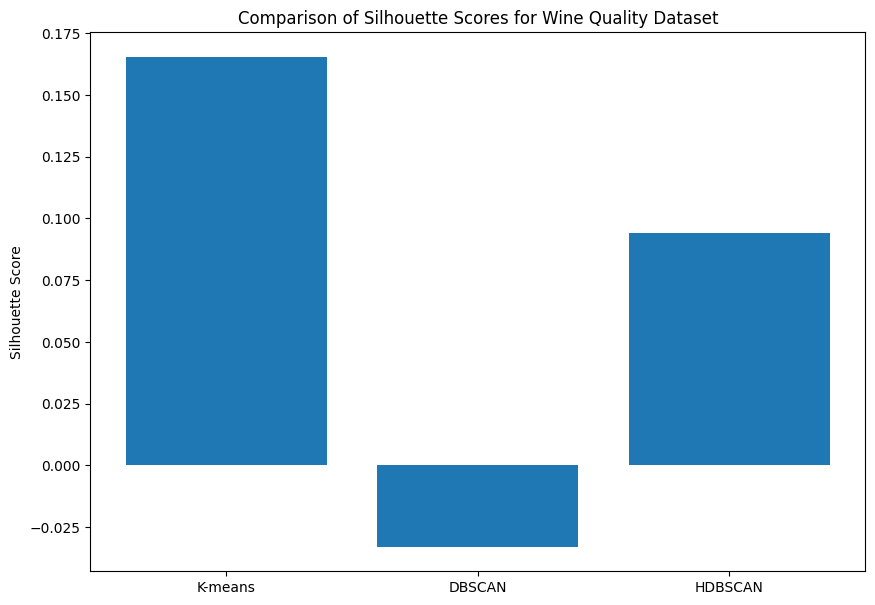

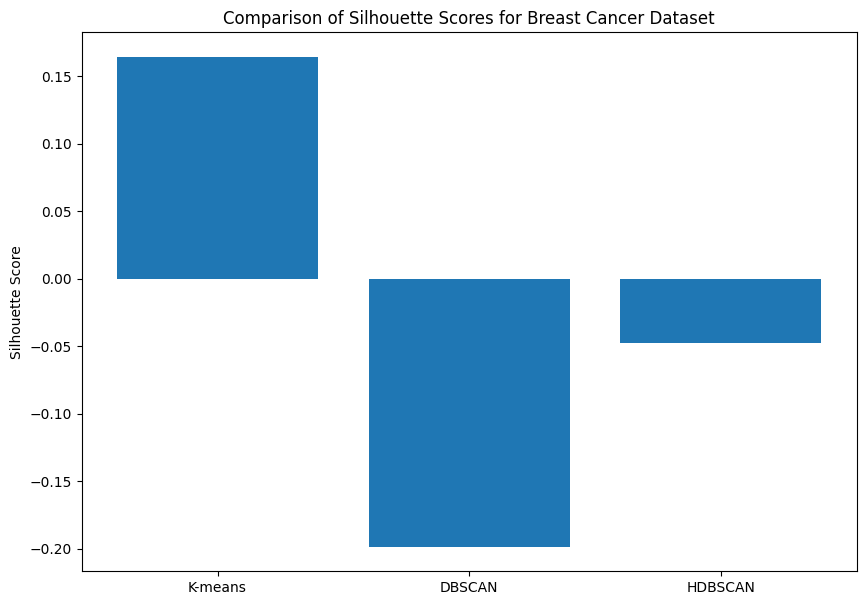

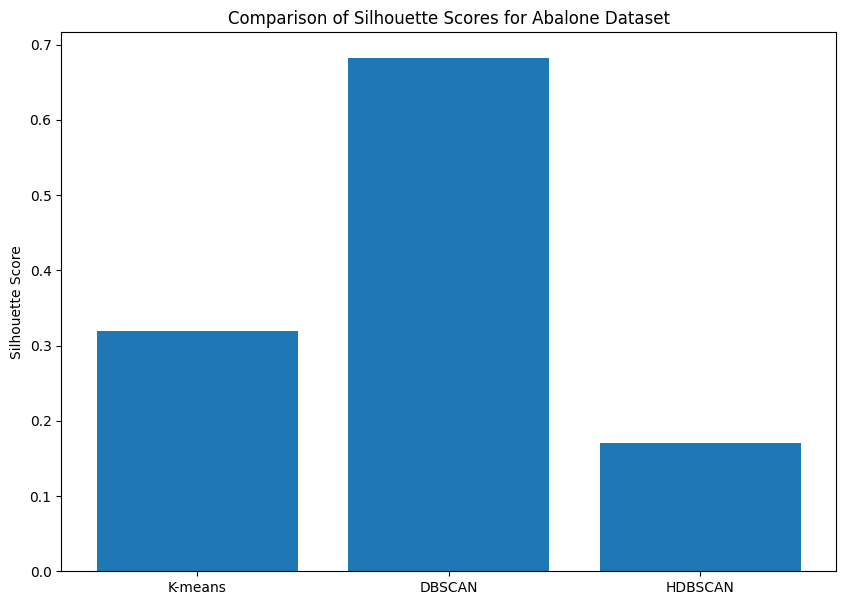

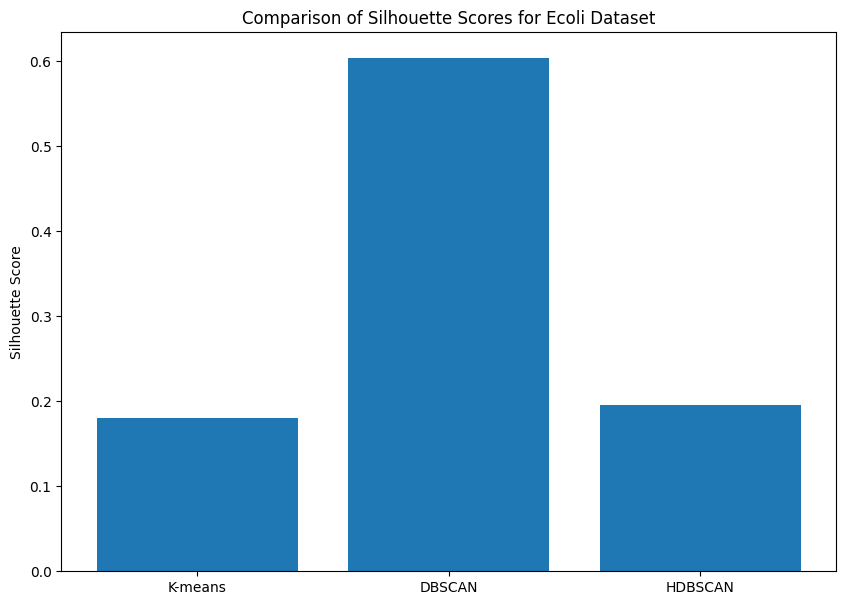

In [108]:
# Comparação dos Silhouette Scores
silhouette_scores = {
    'Wine Quality': [silhouette_score_kmeans_wine, silhouette_score_dbscan_wine, silhouette_score_hdbscan_wine],
    'Breast Cancer': [silhouette_score_kmeans_breast_cancer, silhouette_score_dbscan_breast_cancer, silhouette_score_hdbscan_breast_cancer],
    'Abalone': [silhouette_score_kmeans_abalone, silhouette_score_dbscan_abalone, silhouette_score_hdbscan_abalone],
    'Ecoli': [silhouette_score_kmeans_ecoli, silhouette_score_dbscan_ecoli, silhouette_score_hdbscan_ecoli]
}

labels = ['K-means', 'DBSCAN', 'HDBSCAN']

# Plotando a comparação dos Silhouette Scores para cada dataset
for dataset, scores in silhouette_scores.items():
    plt.figure(figsize=(10, 7))
    plt.bar(labels, scores)
    plt.title(f'Comparison of Silhouette Scores for {dataset} Dataset')
    plt.ylabel('Silhouette Score')
    plt.show()

#### Adjusted Rand Index (ARI)

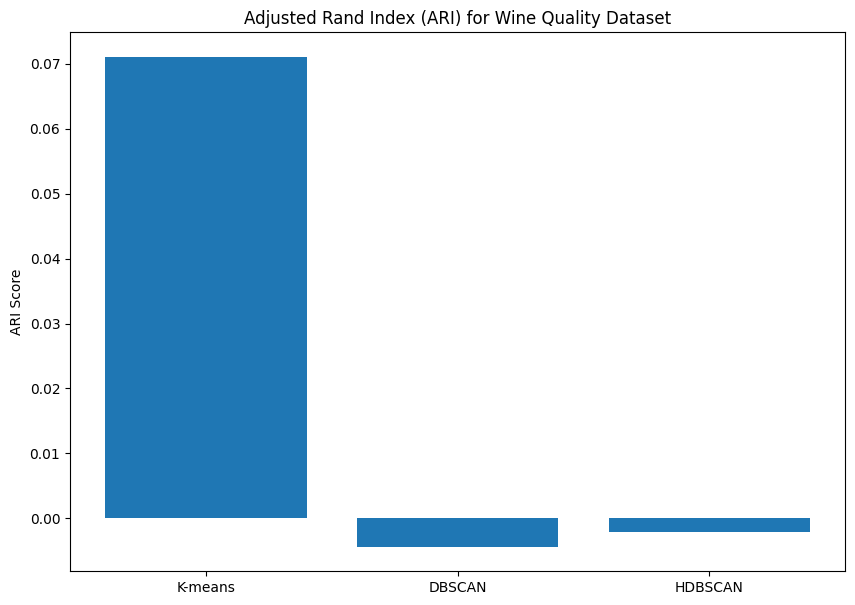

In [29]:
# Supondo que 'true_labels' esteja disponível para validação externa, aqui está um exemplo para o dataset de Wine Quality
true_labels_wine = wine_data['quality'].values

ari_kmeans_wine = calculate_ari(true_labels_wine, clusters_kmeans_wine)
ari_dbscan_wine = calculate_ari(true_labels_wine, clusters_dbscan_wine)
ari_hdbscan_wine = calculate_ari(true_labels_wine, clusters_hdbscan_wine)

ari_scores = {
    'Wine Quality': [ari_kmeans_wine, ari_dbscan_wine, ari_hdbscan_wine],
    # Assumindo que 'true_labels' para outros datasets estejam disponíveis
    'Breast Cancer': [calculate_ari(true_labels_breast_cancer, clusters_kmeans_breast_cancer),
                     calculate_ari(true_labels_breast_cancer, clusters_dbscan_breast_cancer),
       #               calculate_ari(true_labels_breast_cancer, clusters_hdbscan_breast_cancer)],
    #'Abalone': [calculate_ari(true_labels_abalone, clusters_kmeans_abalone),
    #           calculate_ari(true_labels_abalone, clusters_dbscan_abalone),
     #           calculate_ari(true_labels_abalone, clusters_hdbscan_abalone)],
    #'Ecoli': [calculate_ari(true_labels_ecoli, clusters_kmeans_ecoli),
      #        calculate_ari(true_labels_ecoli, clusters_dbscan_ecoli),
       #       calculate_ari(true_labels_ecoli, clusters_hdbscan_ecoli)]
}

# Plotando a comparação dos ARI para cada dataset
for dataset, scores in ari_scores.items():
    plt.figure(figsize=(10, 7))
    plt.bar(labels, scores)
    plt.title(f'Adjusted Rand Index (ARI) for {dataset} Dataset')
    plt.ylabel('ARI Score')
    plt.show()

/tmp/ipykernel_28788/1664722715.py:72: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ecoli_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data', delim_whitespace=True, header=None)
/home/pericles/Projects/mestrado/projeto-agrupamento/project/.venv/lib64/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/pericles/Projects/mestrado/projeto-agrupamento/project/.venv/lib64/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/pericles/Projects/mestrado/projeto-agrupamento/project/.venv/lib

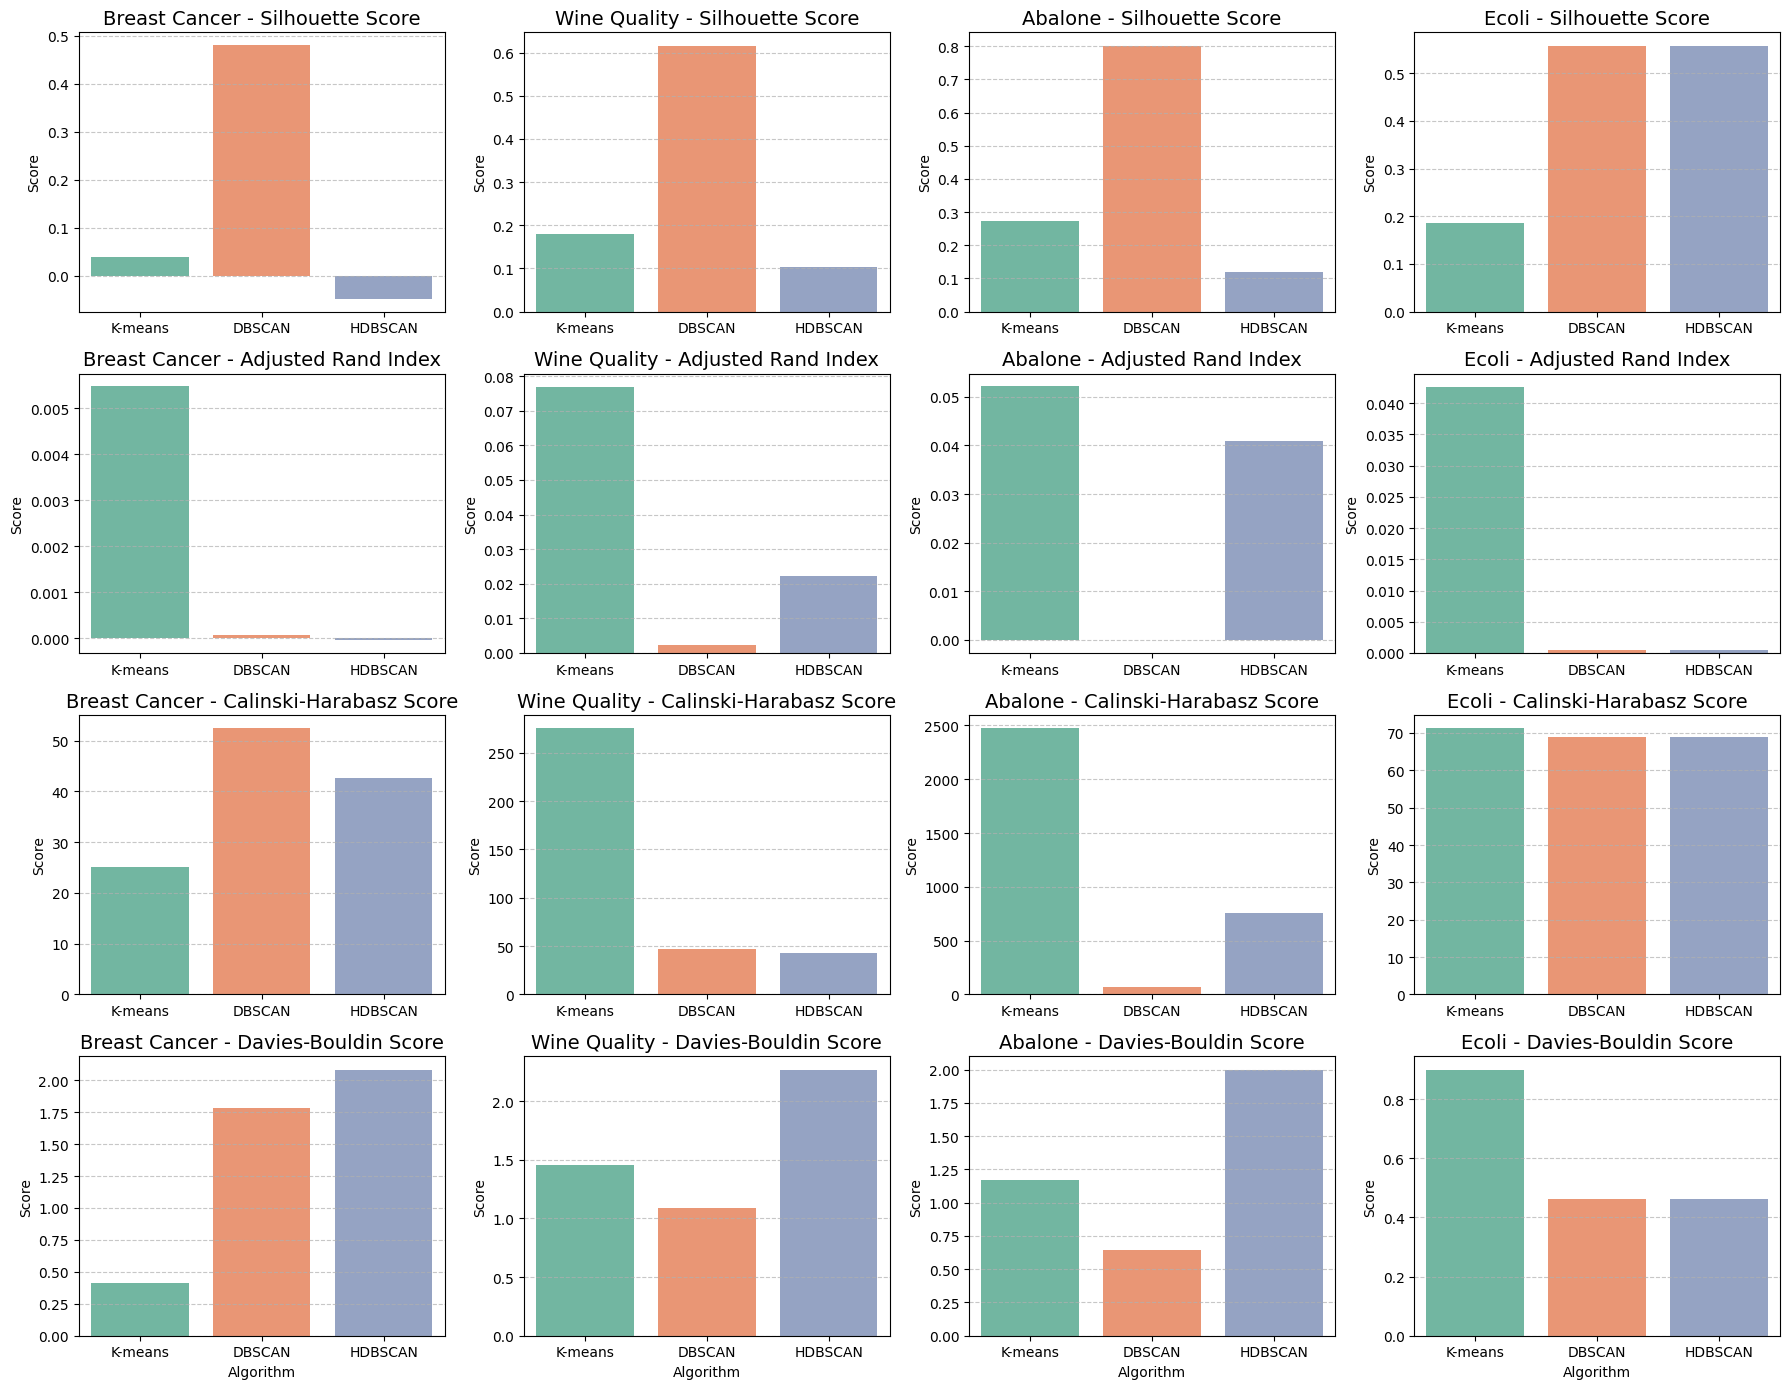

In [137]:
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Funções de Clustering e Avaliação de Silhouette Score
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters, kmeans.labels_

def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    return clusters, dbscan.labels_

def hdbscan_clustering(data, min_cluster_size, min_samples=5):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
    clusters = clusterer.fit_predict(data)
    return clusters, clusterer.labels_

def safe_calculate_silhouette_score(data, labels):
    unique_labels = set(labels)
    if len(unique_labels) > 1:
        return silhouette_score(data, labels)
    else:
        return 0

# Função para calcular ARI
def calculate_ari(data, clusters_true, clusters_pred):
    return adjusted_rand_score(clusters_true, clusters_pred)

# Função para calcular Calinski-Harabasz Score
def calculate_calinski_harabasz_score(data, labels):
    try:
        return calinski_harabasz_score(data, labels)
    except ValueError:
        return 0

# Função para calcular Davies-Bouldin Score
def calculate_davies_bouldin_score(data, labels):
    try:
        return davies_bouldin_score(data, labels)
    except ValueError:
        return float('inf')  # Retorna infinito se ocorrer um erro

# Carregar Dados e Normalizar
breast_cancer_data = pd.read_csv('../datasets/wdbc.data', header=None)
breast_cancer_data.columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
breast_cancer_data = breast_cancer_data.drop(['ID', 'Diagnosis'], axis=1)
breast_cancer_data = breast_cancer_data.dropna()
scaler = StandardScaler()
breast_cancer_data_scaled = scaler.fit_transform(breast_cancer_data)

wine_data = pd.read_csv('../datasets/winequality-red.csv', delimiter=';')
wine_data = wine_data.dropna()
wine_features = wine_data.drop('quality', axis=1)
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_features)

abalone_data = pd.read_csv('../datasets/abalone.data', header=None)
abalone_data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data['Sex'] = abalone_data['Sex'].map({'M': 0, 'F': 1, 'I': 2})
abalone_data = abalone_data.dropna()
abalone_features = abalone_data.drop('Rings', axis=1)
scaler = StandardScaler()
abalone_data_scaled = scaler.fit_transform(abalone_features)

ecoli_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data', delim_whitespace=True, header=None)
ecoli_data.columns = ['Sequence Name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'Class']
ecoli_data = ecoli_data.drop(['Sequence Name', 'Class'], axis=1)
ecoli_data = ecoli_data.dropna()
scaler = StandardScaler()
ecoli_data_scaled = scaler.fit_transform(ecoli_data)

# Executar Clustering e Calcular Métricas
datasets = {
    'Breast Cancer': (breast_cancer_data_scaled, breast_cancer_data['feature_1']),
    'Wine Quality': (wine_data_scaled, wine_data['quality']),
    'Abalone': (abalone_data_scaled, abalone_data['Rings']),
    'Ecoli': (ecoli_data_scaled, ecoli_data['alm1'])
}

results = []

for dataset_name, (data_scaled, true_labels) in datasets.items():
    n_clusters = len(set(true_labels))  # Número de classes no conjunto de dados
    
    # K-means
    clusters_kmeans, labels_kmeans = kmeans_clustering(data_scaled, n_clusters=n_clusters)
    silhouette_kmeans = safe_calculate_silhouette_score(data_scaled, clusters_kmeans)
    ari_kmeans = calculate_ari(data_scaled, true_labels, labels_kmeans)
    ch_score_kmeans = calculate_calinski_harabasz_score(data_scaled, labels_kmeans)
    db_score_kmeans = calculate_davies_bouldin_score(data_scaled, labels_kmeans)

    results.append({'Dataset': dataset_name, 'Algorithm': 'K-means', 'Silhouette Score': silhouette_kmeans, 
                    'ARI': ari_kmeans, 'Calinski-Harabasz': ch_score_kmeans, 'Davies-Bouldin': db_score_kmeans})

    # DBSCAN
    eps_dbscan = 5.0  # Escolha do melhor eps
    clusters_dbscan, labels_dbscan = dbscan_clustering(data_scaled, eps=eps_dbscan, min_samples=5)
    silhouette_dbscan = safe_calculate_silhouette_score(data_scaled, clusters_dbscan)
    ari_dbscan = calculate_ari(data_scaled, true_labels, labels_dbscan)
    ch_score_dbscan = calculate_calinski_harabasz_score(data_scaled, labels_dbscan)
    db_score_dbscan = calculate_davies_bouldin_score(data_scaled, labels_dbscan)
    results.append({'Dataset': dataset_name, 'Algorithm': 'DBSCAN', 'Silhouette Score': silhouette_dbscan, 
                    'ARI': ari_dbscan, 'Calinski-Harabasz': ch_score_dbscan, 'Davies-Bouldin': db_score_dbscan})

    # HDBSCAN
    min_cluster_size_hdbscan = 5  # Escolha do melhor min_cluster_size
    clusters_hdbscan, labels_hdbscan = hdbscan_clustering(data_scaled, min_cluster_size=min_cluster_size_hdbscan)
    silhouette_hdbscan = safe_calculate_silhouette_score(data_scaled, clusters_hdbscan)
    ari_hdbscan = calculate_ari(data_scaled, true_labels, labels_hdbscan)
    ch_score_hdbscan = calculate_calinski_harabasz_score(data_scaled, labels_hdbscan)
    db_score_hdbscan = calculate_davies_bouldin_score(data_scaled, labels_hdbscan)
    results.append({'Dataset': dataset_name, 'Algorithm': 'HDBSCAN', 'Silhouette Score': silhouette_hdbscan, 
                    'ARI': ari_hdbscan, 'Calinski-Harabasz': ch_score_hdbscan, 'Davies-Bouldin': db_score_hdbscan})

# Converter resultados para DataFrame
df_results = pd.DataFrame(results)

# Plotar gráficos de barras para Silhouette Score, ARI, Calinski-Harabasz e Davies-Bouldin
fig, axes = plt.subplots(nrows=4, ncols=len(datasets), figsize=(18, 14))

# Cores para os gráficos
palette = sns.color_palette('Set2')

for i, dataset_name in enumerate(datasets.keys()):
    df_dataset = df_results[df_results['Dataset'] == dataset_name]
    
    # Silhouette Score
    sns.barplot(x='Algorithm', y='Silhouette Score', data=df_dataset, ax=axes[0, i], palette=palette)
    axes[0, i].set_title(f'{dataset_name} - Silhouette Score', fontsize=14)
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Score')
    #axes[0, i].set_ylim(-0.2, 1.0)  # Definindo limite para melhor visualização
    axes[0, i].grid(True, axis='y', linestyle='--', alpha=0.7)

    # ARI
    sns.barplot(x='Algorithm', y='ARI', data=df_dataset, ax=axes[1, i], palette=palette)
    axes[1, i].set_title(f'{dataset_name} - Adjusted Rand Index', fontsize=14)
    axes[1, i].set_xlabel('')
    axes[1, i].set_ylabel('Score')
    #axes[1, i].set_ylim(-0.2, 1.0)  # Definindo limite para melhor visualização
    axes[1, i].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Calinski-Harabasz
    sns.barplot(x='Algorithm', y='Calinski-Harabasz', data=df_dataset, ax=axes[2, i], palette=palette)
    axes[2, i].set_title(f'{dataset_name} - Calinski-Harabasz Score', fontsize=14)
    axes[2, i].set_xlabel('')
    axes[2, i].set_ylabel('Score')
    axes[2, i].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Davies-Bouldin
    sns.barplot(x='Algorithm', y='Davies-Bouldin', data=df_dataset, ax=axes[3, i], palette=palette)
    axes[3, i].set_title(f'{dataset_name} - Davies-Bouldin Score', fontsize=14)
    axes[3, i].set_xlabel('Algorithm')
    axes[3, i].set_ylabel('Score')
    axes[3, i].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [141]:
import numpy as np
from scipy.spatial.distance import euclidean, pdist

def calculate_dunn_index(data, labels):
    unique_labels = np.unique(labels)
    clusters = [data[labels == label] for label in unique_labels if label != -1]

    if len(clusters) < 2:
        return 0

    # Calcula o diâmetro de cada cluster (máxima distância intra-cluster)
    diameters = []
    for cluster in clusters:
        if len(cluster) > 1:
            diameters.append(np.max(pdist(cluster)))
        else:
            diameters.append(0)

    # Calcula a menor distância inter-cluster
    min_intercluster_distance = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            if len(clusters[i]) > 0 and len(clusters[j]) > 0:
                for point_i in clusters[i]:
                    for point_j in clusters[j]:
                        distance = euclidean(point_i, point_j)
                        if distance < min_intercluster_distance:
                            min_intercluster_distance = distance

    if min_intercluster_distance == np.inf:
        return 0

    dunn_index = min_intercluster_distance / np.max(diameters)
    return dunn_index


/tmp/ipykernel_28788/890422670.py:101: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ecoli_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data', delim_whitespace=True, header=None)
/home/pericles/Projects/mestrado/projeto-agrupamento/project/.venv/lib64/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/pericles/Projects/mestrado/projeto-agrupamento/project/.venv/lib64/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/pericles/Projects/mestrado/projeto-agrupamento/project/.venv/lib64/p

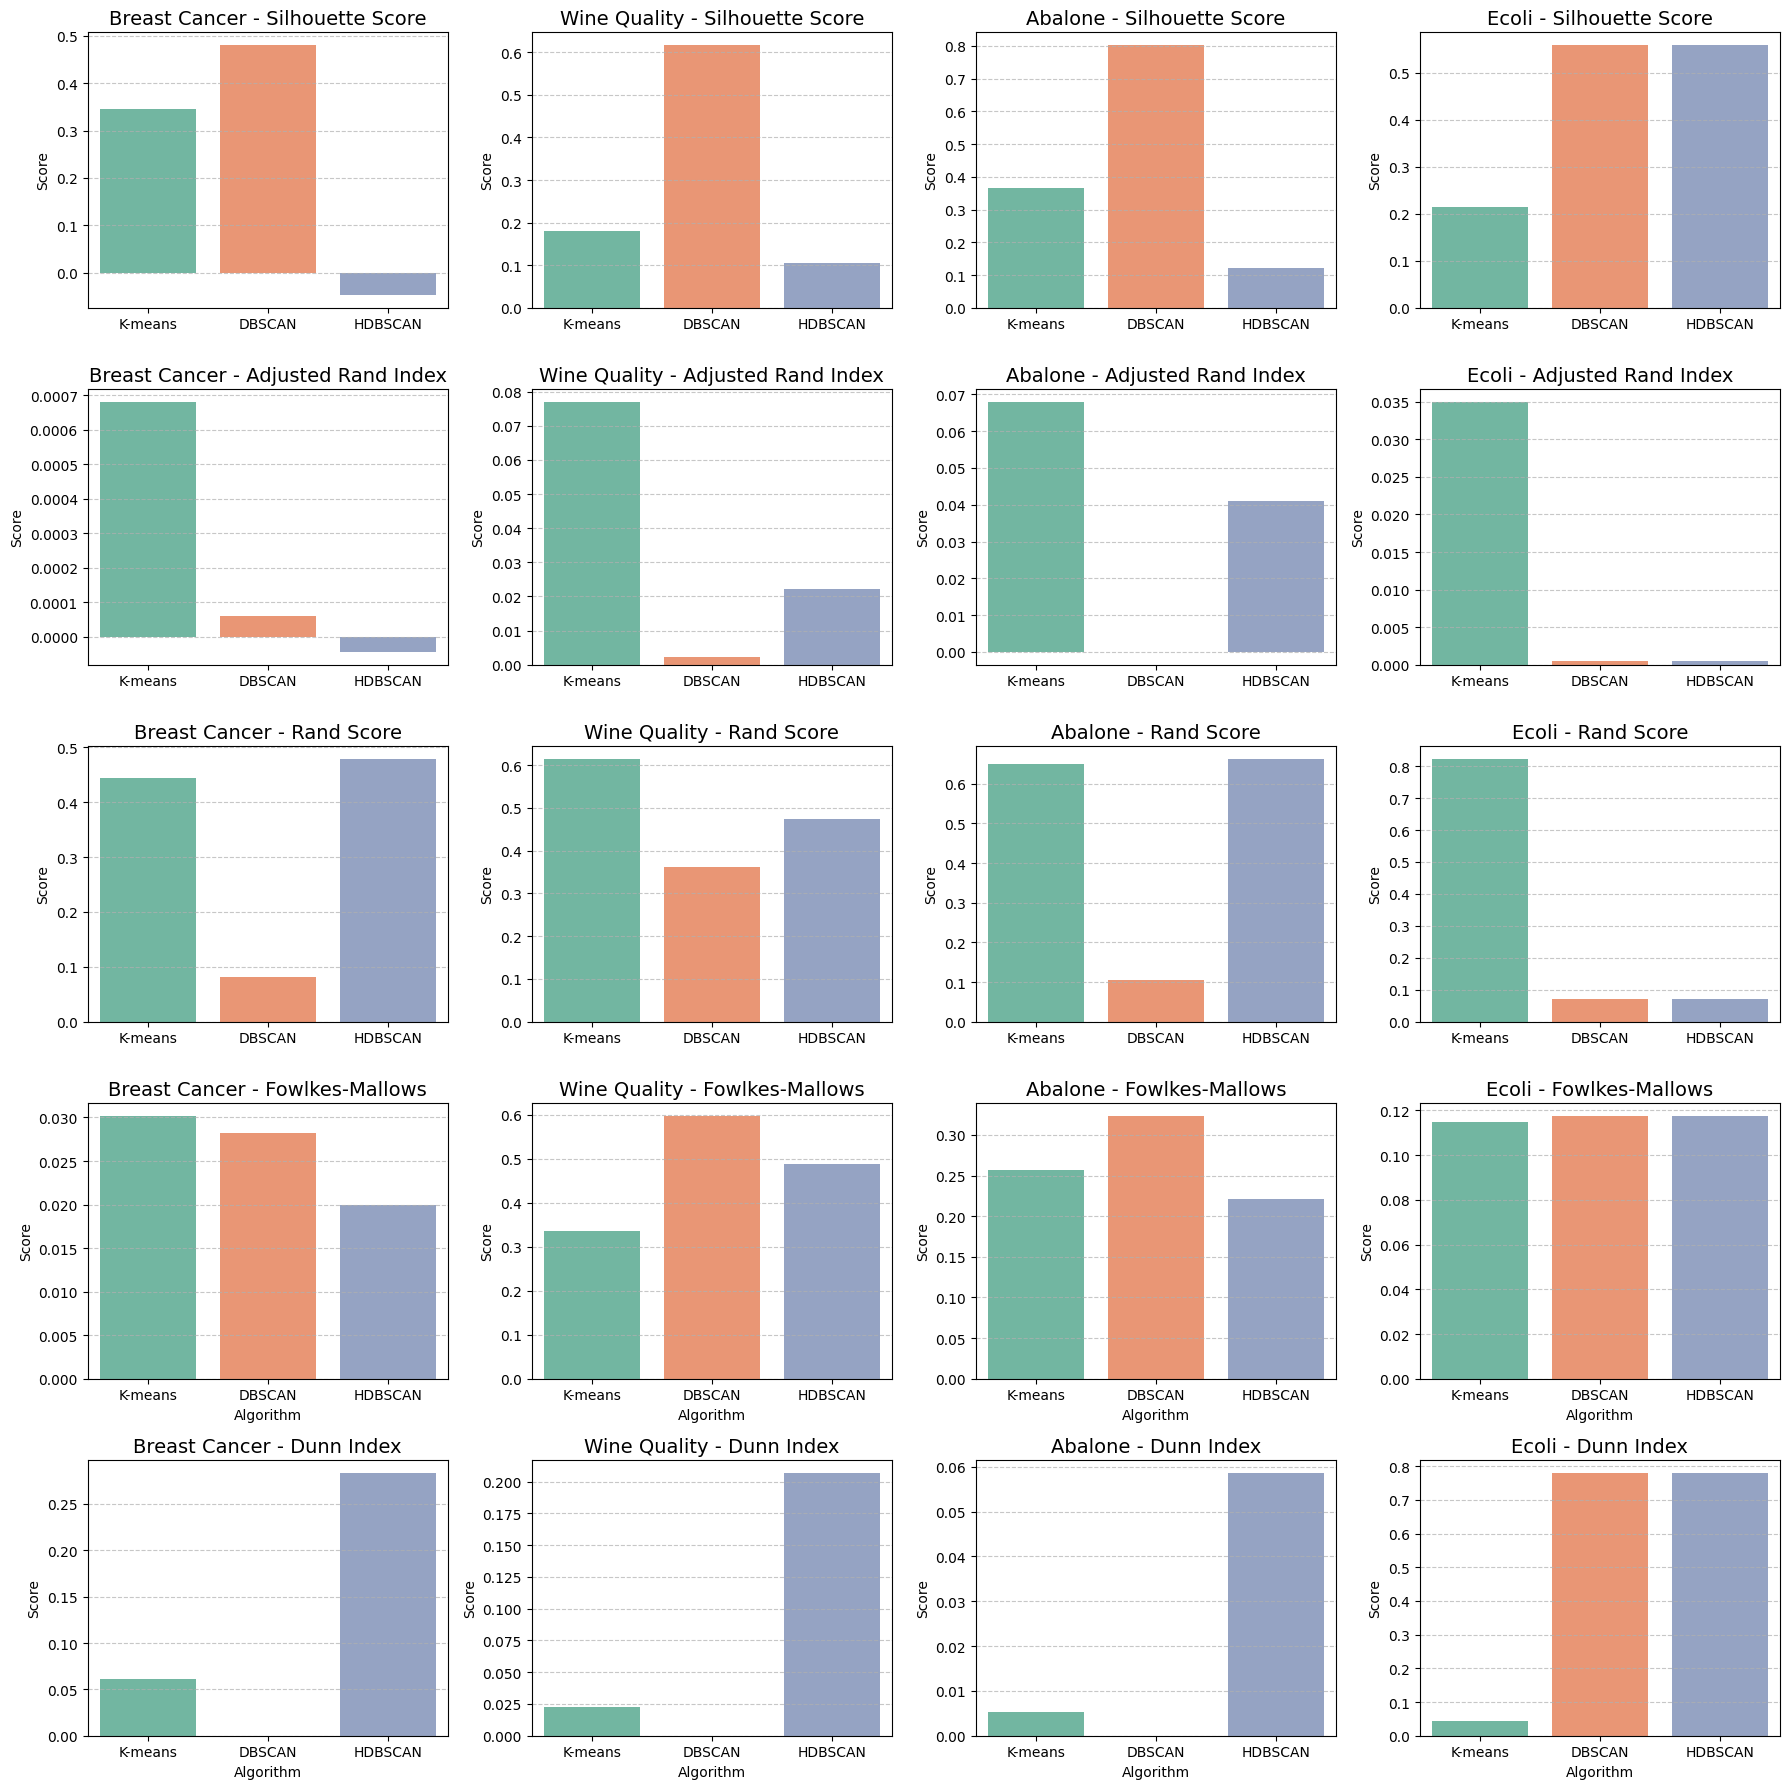

In [146]:
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score, fowlkes_mallows_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import euclidean, pdist

# Funções de Clustering e Avaliação de Silhouette Score
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters, kmeans.labels_

def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    return clusters, dbscan.labels_

def hdbscan_clustering(data, min_cluster_size, min_samples=5):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
    clusters = clusterer.fit_predict(data)
    return clusters, clusterer.labels_

def safe_calculate_silhouette_score(data, labels):
    unique_labels = set(labels)
    if len(unique_labels) > 1:
        return silhouette_score(data, labels)
    else:
        return 0

# Função para calcular ARI
def calculate_ari(data, clusters_true, clusters_pred):
    return adjusted_rand_score(clusters_true, clusters_pred)

# Função para calcular Rand Score
def calculate_rand_score(data, clusters_true, clusters_pred):
    return rand_score(clusters_true, clusters_pred)

# Função para calcular Fowlkes-Mallows Score
def calculate_fowlkes_mallows_score(data, clusters_true, clusters_pred):
    return fowlkes_mallows_score(clusters_true, clusters_pred)

# Função para calcular o Índice de Dunn
def calculate_dunn_index(data, labels):
    unique_labels = np.unique(labels)
    clusters = [data[labels == label] for label in unique_labels if label != -1]

    if len(clusters) < 2:
        return 0

    # Calcula o diâmetro de cada cluster (máxima distância intra-cluster)
    diameters = []
    for cluster in clusters:
        if len(cluster) > 1:
            diameters.append(np.max(pdist(cluster)))
        else:
            diameters.append(0)

    # Calcula a menor distância inter-cluster
    min_intercluster_distance = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            if len(clusters[i]) > 0 and len(clusters[j]) > 0:
                for point_i in clusters[i]:
                    for point_j in clusters[j]:
                        distance = euclidean(point_i, point_j)
                        if distance < min_intercluster_distance:
                            min_intercluster_distance = distance

    if min_intercluster_distance == np.inf:
        return 0

    dunn_index = min_intercluster_distance / np.max(diameters)
    return dunn_index

# Carregar Dados e Normalizar
breast_cancer_data = pd.read_csv('../datasets/wdbc.data', header=None)
breast_cancer_data.columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
breast_cancer_data = breast_cancer_data.drop(['ID', 'Diagnosis'], axis=1)
breast_cancer_data = breast_cancer_data.dropna()
scaler = StandardScaler()
breast_cancer_data_scaled = scaler.fit_transform(breast_cancer_data)

wine_data = pd.read_csv('../datasets/winequality-red.csv', delimiter=';')
wine_data = wine_data.dropna()
wine_features = wine_data.drop('quality', axis=1)
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_features)

abalone_data = pd.read_csv('../datasets/abalone.data', header=None)
abalone_data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data['Sex'] = abalone_data['Sex'].map({'M': 0, 'F': 1, 'I': 2})
abalone_data = abalone_data.dropna()
abalone_features = abalone_data.drop('Rings', axis=1)
scaler = StandardScaler()
abalone_data_scaled = scaler.fit_transform(abalone_features)

ecoli_data = pd.read_csv('../datasets/ecoli.data', delim_whitespace=True, header=None)
ecoli_data.columns = ['Sequence Name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'Class']
ecoli_data = ecoli_data.drop(['Sequence Name', 'Class'], axis=1)
ecoli_data = ecoli_data.dropna()
scaler = StandardScaler()
ecoli_data_scaled = scaler.fit_transform(ecoli_data)

# Executar Clustering e Calcular Métricas
datasets = {
    'Breast Cancer': (breast_cancer_data_scaled, breast_cancer_data['feature_1']),
    'Wine Quality': (wine_data_scaled, wine_data['quality']),
    'Abalone': (abalone_data_scaled, abalone_data['Rings']),
    'Ecoli': (ecoli_data_scaled, ecoli_data['alm1'])
}

clusters = {
    'Breast Cancer': 2,
    'Wine Quality': 6,
    'Abalone': 3,
    'Ecoli': 8
}
results = []

for dataset_name, (data_scaled, true_labels) in datasets.items():
    n_clusters = len(set(true_labels))  # Número de classes no conjunto de dados
    
    # K-means
    clusters_kmeans, labels_kmeans = kmeans_clustering(data_scaled, n_clusters=clusters[dataset_name])
    silhouette_kmeans = safe_calculate_silhouette_score(data_scaled, clusters_kmeans)
    ari_kmeans = calculate_ari(data_scaled, true_labels, labels_kmeans)
    rand_kmeans = calculate_rand_score(data_scaled, true_labels, labels_kmeans)
    fowlkes_mallows_kmeans = calculate_fowlkes_mallows_score(data_scaled, true_labels, labels_kmeans)
    dunn_kmeans = calculate_dunn_index(data_scaled, labels_kmeans)

    results.append({'Dataset': dataset_name, 'Algorithm': 'K-means', 'Silhouette Score': silhouette_kmeans, 
                    'ARI': ari_kmeans, 'Rand Score': rand_kmeans, 'Fowlkes-Mallows': fowlkes_mallows_kmeans, 'Dunn Index': dunn_kmeans})

    # DBSCAN
    eps_dbscan = 5.0  # Escolha do melhor eps
    clusters_dbscan, labels_dbscan = dbscan_clustering(data_scaled, eps=eps_dbscan, min_samples=5)
    silhouette_dbscan = safe_calculate_silhouette_score(data_scaled, clusters_dbscan)
    ari_dbscan = calculate_ari(data_scaled, true_labels, labels_dbscan)
    rand_dbscan = calculate_rand_score(data_scaled, true_labels, labels_dbscan)
    fowlkes_mallows_dbscan = calculate_fowlkes_mallows_score(data_scaled, true_labels, labels_dbscan)
    dunn_dbscan = calculate_dunn_index(data_scaled, labels_dbscan)
    
    results.append({'Dataset': dataset_name, 'Algorithm': 'DBSCAN', 'Silhouette Score': silhouette_dbscan, 
                    'ARI': ari_dbscan, 'Rand Score': rand_dbscan, 'Fowlkes-Mallows': fowlkes_mallows_dbscan, 'Dunn Index': dunn_dbscan})

    # HDBSCAN
    min_cluster_size_hdbscan = 5  # Escolha do melhor min_cluster_size
    clusters_hdbscan, labels_hdbscan = hdbscan_clustering(data_scaled, min_cluster_size=min_cluster_size_hdbscan)
    silhouette_hdbscan = safe_calculate_silhouette_score(data_scaled, clusters_hdbscan)
    ari_hdbscan = calculate_ari(data_scaled, true_labels, labels_hdbscan)
    rand_hdbscan = calculate_rand_score(data_scaled, true_labels, labels_hdbscan)
    fowlkes_mallows_hdbscan = calculate_fowlkes_mallows_score(data_scaled, true_labels, labels_hdbscan)
    dunn_hdbscan = calculate_dunn_index(data_scaled, labels_hdbscan)
    
    results.append({'Dataset': dataset_name, 'Algorithm': 'HDBSCAN', 'Silhouette Score': silhouette_hdbscan, 
                    'ARI': ari_hdbscan, 'Rand Score': rand_hdbscan, 'Fowlkes-Mallows': fowlkes_mallows_hdbscan, 'Dunn Index': dunn_hdbscan})

# Converter resultados para DataFrame
df_results = pd.DataFrame(results)

# Visualizar Resultados
fig, axes = plt.subplots(nrows=5, ncols=len(datasets), figsize=(18, 18))
palette = sns.color_palette('Set2')

for i, dataset_name in enumerate(datasets.keys()):
    df_dataset = df_results[df_results['Dataset'] == dataset_name]
    
    # Silhouette Score
    sns.barplot(x='Algorithm', y='Silhouette Score', data=df_dataset, ax=axes[0, i], palette=palette)
    axes[0, i].set_title(f'{dataset_name} - Silhouette Score', fontsize=14)
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Score')
    axes[0, i].grid(True, axis='y', linestyle='--', alpha=0.7)

    # ARI
    sns.barplot(x='Algorithm', y='ARI', data=df_dataset, ax=axes[1, i], palette=palette)
    axes[1, i].set_title(f'{dataset_name} - Adjusted Rand Index', fontsize=14)
    axes[1, i].set_xlabel('')
    axes[1, i].set_ylabel('Score')
    axes[1, i].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Rand Score
    sns.barplot(x='Algorithm', y='Rand Score', data=df_dataset, ax=axes[2, i], palette=palette)
    axes[2, i].set_title(f'{dataset_name} - Rand Score', fontsize=14)
    axes[2, i].set_xlabel('')
    axes[2, i].set_ylabel('Score')
    axes[2, i].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Fowlkes-Mallows
    sns.barplot(x='Algorithm', y='Fowlkes-Mallows', data=df_dataset, ax=axes[3, i], palette=palette)
    axes[3, i].set_title(f'{dataset_name} - Fowlkes-Mallows', fontsize=14)
    axes[3, i].set_xlabel('Algorithm')
    axes[3, i].set_ylabel('Score')
    axes[3, i].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Dunn Index
    sns.barplot(x='Algorithm', y='Dunn Index', data=df_dataset, ax=axes[4, i], palette=palette)
    axes[4, i].set_title(f'{dataset_name} - Dunn Index', fontsize=14)
    axes[4, i].set_xlabel('Algorithm')
    axes[4, i].set_ylabel('Score')
    axes[4, i].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
